# Import Libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load and Explore Data

In [43]:
# Load dataset
df = pd.read_csv('Ecommerce Customers.csv')

In [44]:
print("📊 Dataset Overview:")
print(f"Total Customers: {len(df)}")
print(f"Features: {len(df.columns)}")
print("First few rows:")
df.head()

📊 Dataset Overview:
Total Customers: 500
Features: 8
First few rows:


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [45]:
print("📈 Statistical Summary:")
df.describe()

📈 Statistical Summary:


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [46]:
print("🔍 Data Info:")
df.info()

🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Jointplot to compare the Time on Website and Yearly Amount Spent columns.

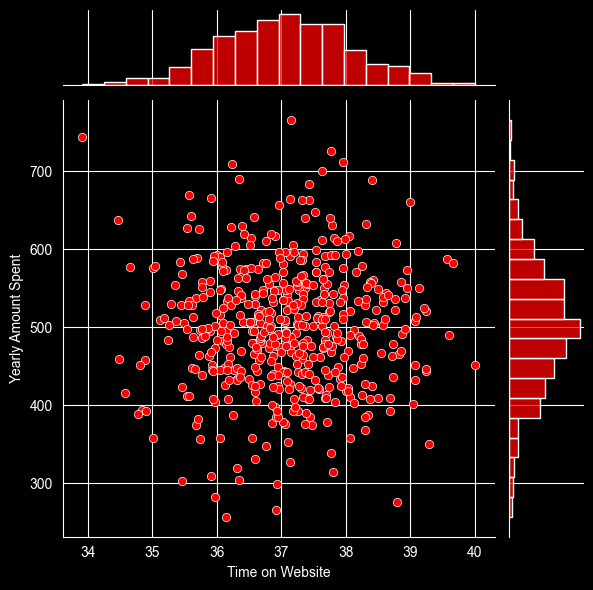

In [47]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, color='red')

# Jointplot to compare the Time on App and Yearly Amount Spent columns.

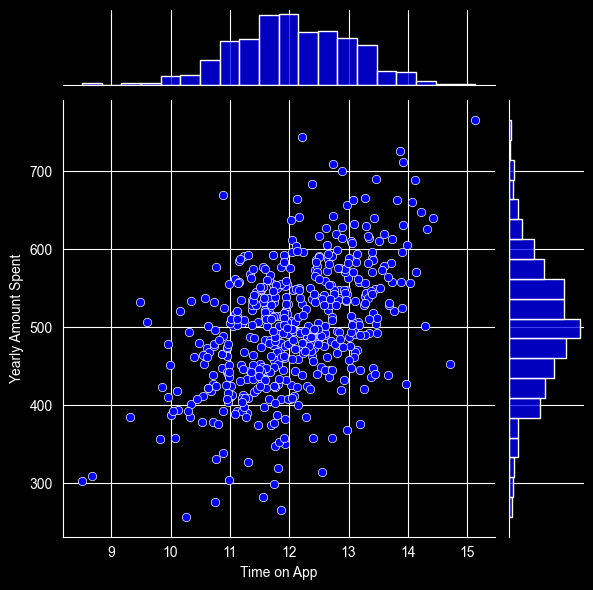

In [48]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, color='blue')

# Jointplot to compare the Time on App and Length of Membership columns.

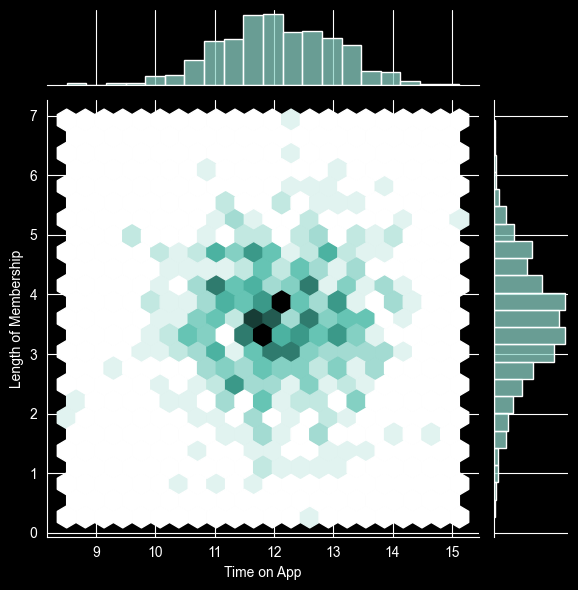

In [49]:
sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')

# Pairplot

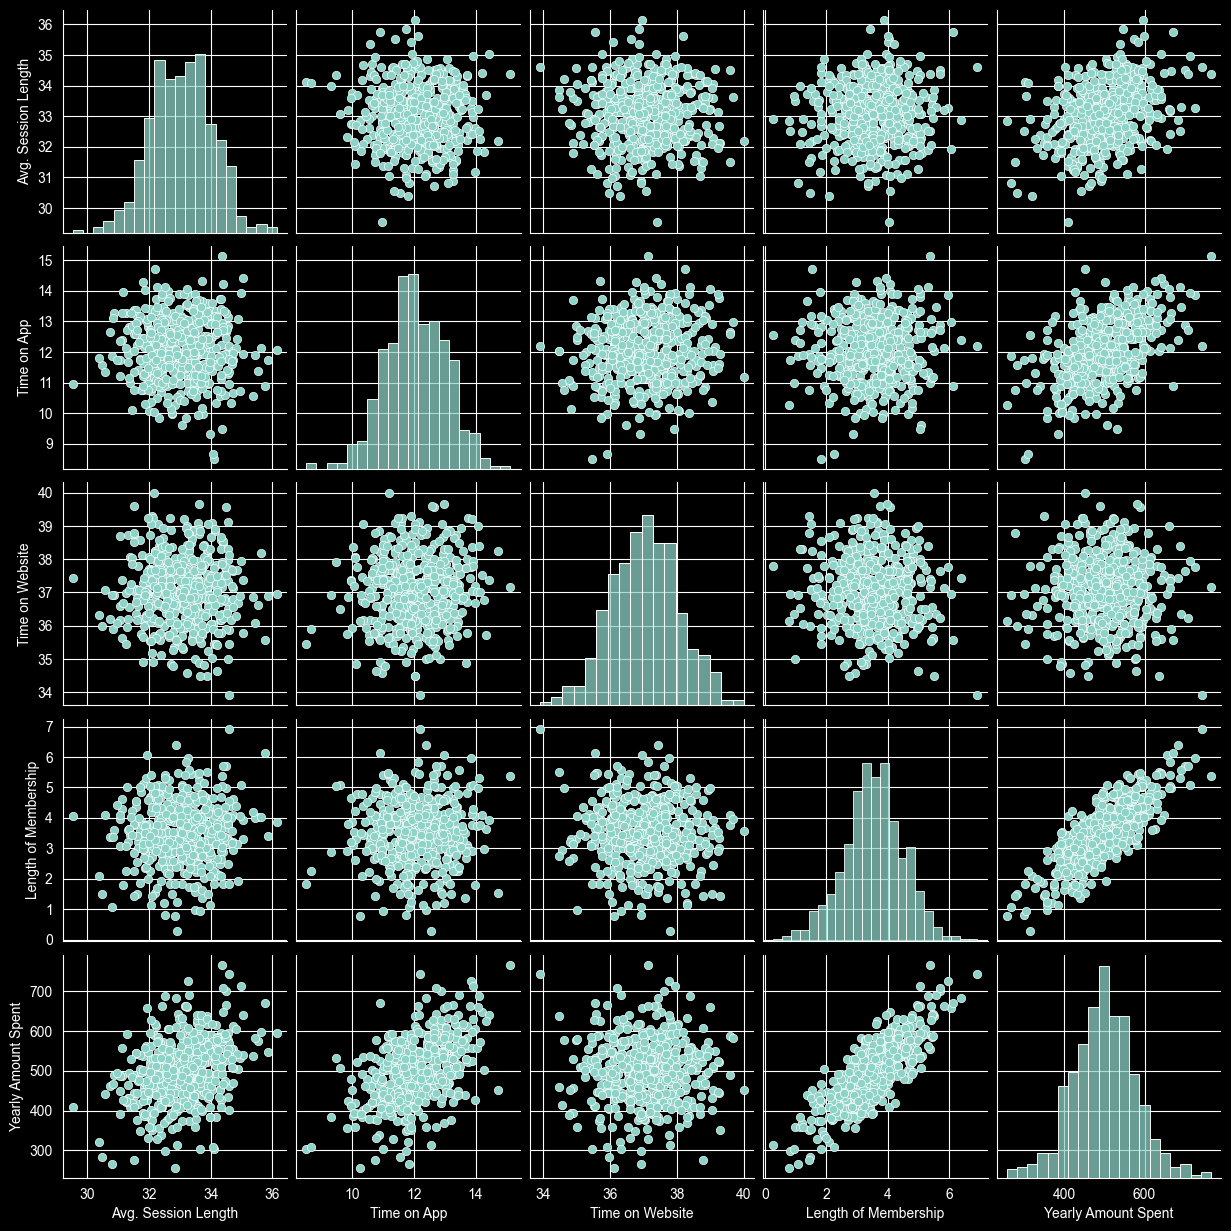

In [50]:
sns.pairplot(df)

# Correlation

In [51]:
df.corr(numeric_only=True)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Most correlated feature: **Length of Membership**

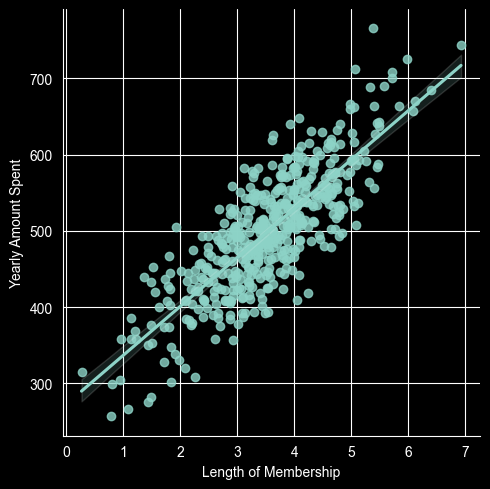

In [55]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

# Train Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

In [ ]:
X = df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Split Data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create and train model
lm = LinearRegression()
lm.fit(X_train,y_train)

**Train/Fit on the training data**

# Coefficients of the Model

In [ ]:
lm.coef_

# Make Predictions and Evaluate Models

In [ ]:
# Make predictions
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test, predictions, color='cyan')
plt.xlabel('y_test(True Values)')
plt.ylabel('Predicted Values')

# Evaluate the Model

In [ ]:
from sklearn import metrics

In [ ]:
# Calculate metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = metrics.root_mean_squared_error(y_test,predictions)
r_square = metrics.explained_variance_score(y_test, predictions)

In [ ]:
print("📈 Model Performance Metrics:")
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R^2:',r_square)

In [ ]:
cdf=pd.DataFrame(lm.coef_, X.columns,columns=['Coeff'])
cdf

# Residuals

In [ ]:
sns.displot(y_test-predictions, bins=50, color='purple')